# Ridge Regression with Grid Search on California Housing Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [4]:
# -----------------------------
# 1. Load California Housing Dataset
# -----------------------------
data = fetch_california_housing()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [5]:
# -----------------------------
# 2. Train-Test Split
# -----------------------------
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [6]:
# -----------------------------
# 3. Feature Scaling
# -----------------------------
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# -----------------------------
# 4. Define Ridge Model and Parameter Grid
# -----------------------------
ridge = Ridge()
param_grid = {
    'alpha':np.logspace(-3,3,20),
    'solver':['auto','svd','cholesky','lsqr']
}

Note

| Scenario                                      | Should we include `solver` in GridSearch? |
| --------------------------------------------- | ----------------------------------------- |
| Small and simple dataset                      | ❌ Not necessary                           |
| Very large dataset / has rank deficiency      | ✅ Yes, it's helpful                       |
| You want to test all possibilities to be sure | ✅ You can include it                      |


In [8]:
# -----------------------------
# 5. Grid Search with Cross-Validation
# -----------------------------
grid_search = GridSearchCV(ridge,param_grid,scoring='r2',return_train_score=True)
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03]),
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr']},
             return_train_score=True, scoring='r2')

In [13]:
# -----------------------------
# 6. Best Model Evaluation
# -----------------------------
best_ridge = grid_search.best_estimator_
y_pred = best_ridge.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Test R^2 Score: {r2:.4f}")

Best Hyperparameters: {'alpha': np.float64(6.158482110660261), 'solver': 'auto'}
Test R^2 Score: 0.5959


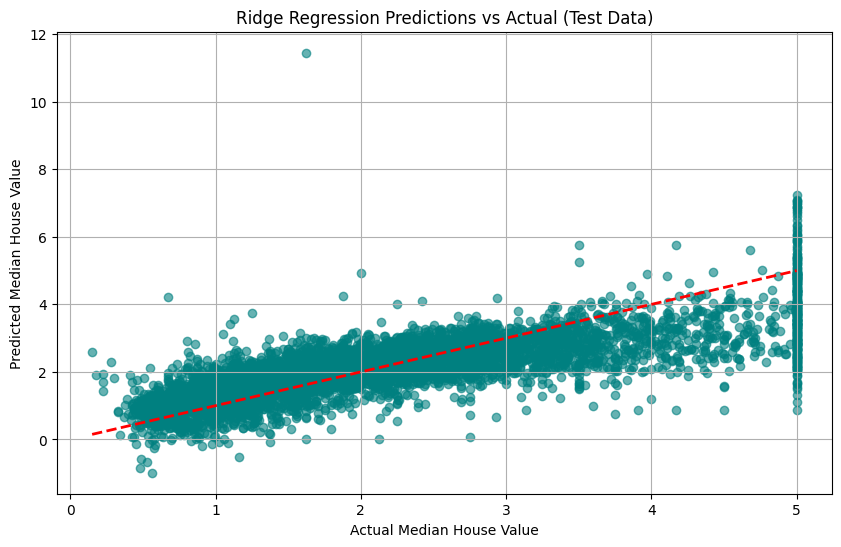

In [11]:
# -----------------------------
# 7. Visualization: Predictions vs Actual
# -----------------------------
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Ridge Regression Predictions vs Actual (Test Data)')
plt.grid(True)
plt.show()

In [14]:
# -----------------------------
# 8. Grid Search Results Summary
# -----------------------------
cv_results = pd.DataFrame(grid_search.cv_results_)
summary = cv_results[['param_alpha', 'param_solver', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

print("\nTop 5 Grid Search Results:")
print(summary.head())



Top 5 Grid Search Results:
    param_alpha param_solver  mean_test_score
48     6.158482         auto         0.606589
49     6.158482          svd         0.606589
50     6.158482     cholesky         0.606589
51     6.158482         lsqr         0.606589
44     2.976351         auto         0.606587


#  Grid Search Cross-Validation Results Summary:

`**Optimal Alpha Value**`

We tested 20 different values for Alpha (ranging from 0.001 to 1000).

The result showed that the best performance was achieved when Alpha = 6.158.

This means that the level of regularization (penalizing large weight values) at this value provided the best balance between:

Bias ➜ The model learns properly (low underfitting).

Variance ➜ The model does not memorize noise in the data (low overfitting).

The goal of Alpha is to control the strength of this balance so we avoid either overfitting or underfitting.

`**Solver Selection Impact**`

All types of solvers (auto, svd, cholesky, lsqr) gave the exact same R² score: 0.6066.

This means:

The choice of solver had no real impact on the result because:

The dataset is not very large.

The problem is simple (linear).

Each solver used a different method to reach the same solution.

`**Model Performance**`

The best R² score achieved was 0.6066.

R² means: "The percentage of the variance in the target (house price) that the model can explain or predict."

So, the model was able to explain about 60.66% of the relationship between the features (e.g., number of rooms, area, etc.) and the house price.

Although this value isn’t very high (since it’s a basic linear model), it’s considered a good baseline model to start with.

`**Hyperparameter Sensitivity**`

Around the optimal Alpha value (6.158), we noticed that small changes in Alpha did not significantly affect the result.

This means:

The model is robust in terms of tuning.

Choosing an Alpha close to 6 will give similar results, so extreme precision is not necessary around that value.

